# Car Price Prediction

The goal is to predict car price

The followings describe the features in the dataset

- **name** : Brand and series of the car
- **Year** : The year when the car is produced
- **selling_price** : Selling price of the car
- **km_driven** : The amount of kilometer that the car was driven before selling the car
- **fuel** : The type of fuel used in the car
- **seller_type** : The channel through which the deal of car is organized
- **transmission** : The gear transmission type that is used in the car
- **owner** : The number of times that the car was traded before
- **mileage** : The kilometers that can be traveled by using the fuel of 1 liter or 1 kg
- **engine** : The size of the engine
- **max_power** : The maximum power of engine measured in bhp. (BHP - the brake horsepower is the horse power after taking account of losses due to friction)
- **torque** : Torque
- **seats** : The number of seats in the car

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import os
import mlflow

warnings.filterwarnings('ignore')

In [2]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('1.26.4', '2.2.2', '0.13.2', '3.9.2')

## 1. Load data

In [3]:
# Load the data
df = pd.read_csv(os.path.join(os.getcwd(),"data/Cars.csv"))

In [4]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [5]:
# Check the shape of your data
df.shape

(8128, 13)

In [6]:
# Statistical info 
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [7]:
# Check Dtypes of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [8]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### 2.1 Data Cleansing

We need to perform data cleansing as the data is not tidy yet.

In [9]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [10]:
df.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


####  2.1.1 - We will remove torque feature as we don't understand the feature

In [11]:
# Remove torque feature
df.drop('torque',axis=1,inplace=True)

####  2.1.2 - We will remove the rows with owner "Test Drive Car" as the price is too high which makes them outliers and this only has 5 rows

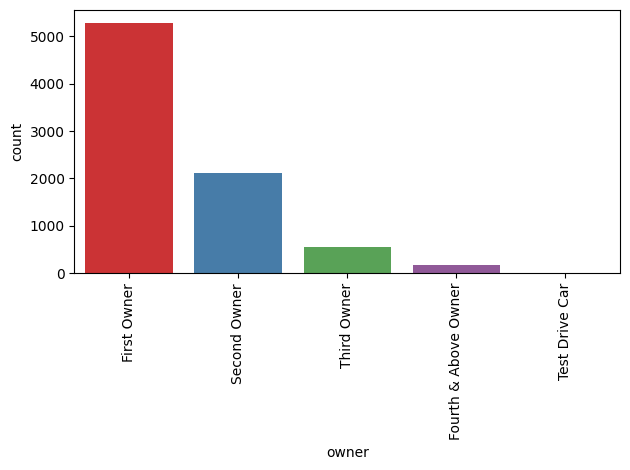

In [12]:
# Checking counts of owner types
ax = sns.countplot(data = df, x = 'owner',palette= 'Set1')
ax.set_xticklabels(df['owner'].unique(),rotation=90)
plt.tight_layout()
plt.show()

In [13]:
# checking the count of test drive car
df.loc[df['owner'] == 'Test Drive Car','selling_price'].count()

5

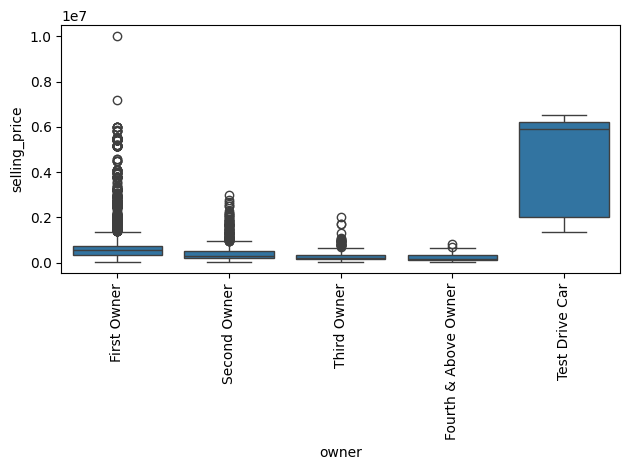

In [14]:
# checking the distribution of owner types
ax = sns.boxplot(x = df["owner"], y = df["selling_price"])
ax.set_xticklabels(df['owner'].unique(),rotation=90)
plt.tight_layout()
plt.show()

In [15]:
# Remove rows with "Test Drive Car"
df = df[df['owner'] != 'Test Drive Car']

####  2.1.3 - We will map the owner types to 1 to 4

In [16]:
owner = {'First Owner' : 1,
         'Second Owner' : 2,
         'Third Owner' : 3,
         'Fourth & Above Owner' : 4
         }

for k,v in owner.items():
    df.replace(k,v,inplace=True)

####  2.1.4 - We will remove the rows with fuel types "LPG" and "CNG" as they use different mileage units and it has only 38 rows

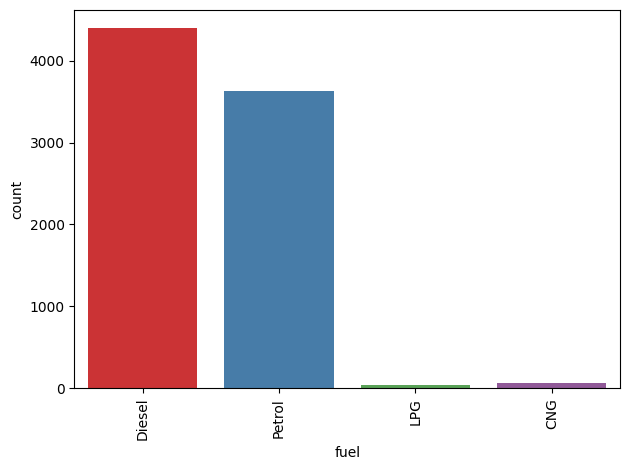

In [17]:
# Checking counts of fuel types
ax = sns.countplot(data = df, x = 'fuel',palette= 'Set1')
ax.set_xticklabels(df['fuel'].unique(),rotation=90)
plt.tight_layout()
plt.show()

In [18]:
# Checking fuel milage units
df[df['fuel'].isin(['LPG','CND'])]['mileage'].head()

6       17.3 km/kg
90      26.2 km/kg
870     26.2 km/kg
1511    26.2 km/kg
1658    17.3 km/kg
Name: mileage, dtype: object

In [19]:
# Checking the number of fuel types "LPG,CNd"
df[df['fuel'].isin(['LPG','CND'])].shape

(38, 12)

In [20]:
# Remove the rows with fuel types "LPG,CNd"
df = df[~df['fuel'].isin(['LPG', 'CNG'])]
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

####  2.1.5 - removing unit 'kmpl' in 'milage' feature and convert it into numerical feature

In [21]:
# Replace 'kmpl' with blank
df.loc[df['mileage'].str.split(" ").str[1] == 'kmpl', 'mileage'] = df.loc[df['mileage'].str.split(" ").str[1] == 'kmpl', 'mileage'].str.replace(" kmpl", "")

In [22]:
# Convert mileage feature to float
df['mileage'] = df['mileage'].astype(float)

####  2.1.6 - removing unit 'CC' in 'engine' feature and convert it into numerical feature

In [23]:
# Replace 'CC' with blank
df.loc[df['engine'].str.split(" ").str[1] == 'CC', 'engine'] = df.loc[df['engine'].str.split(" ").str[1] == 'CC', 'engine'].str.replace(" CC", "")

In [24]:
# Convert engine feature to float
df['engine'] = df['engine'].astype(float)

####  2.1.7 - removing unit 'bhp' in 'max_power' feature and convert it into numerical feature

In [25]:
# Replace 'bhp' with blank
df.loc[df['max_power'].str.split(" ").str[1] == 'bhp', 'max_power'] = df.loc[df['max_power'].str.split(" ").str[1] == 'bhp', 'max_power'].str.replace(" bhp", "")

In [26]:
# Convert max_power feature to float
df['max_power'] = df['max_power'].astype(float)

####  2.1.8 - We will transform the name feature to brand feature by taking the first word of names

In [27]:
# rename the column
df.rename(columns = {'name':'brand'}, inplace = True)

In [28]:
# Taking the first word of name
df['brand'] = df['brand'].str.split(" ").str[0]

In [29]:
# Checking clean data
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


### 2.2 Univariate analysis

Single variable exploratory data anlaysis

#### Checking distributions

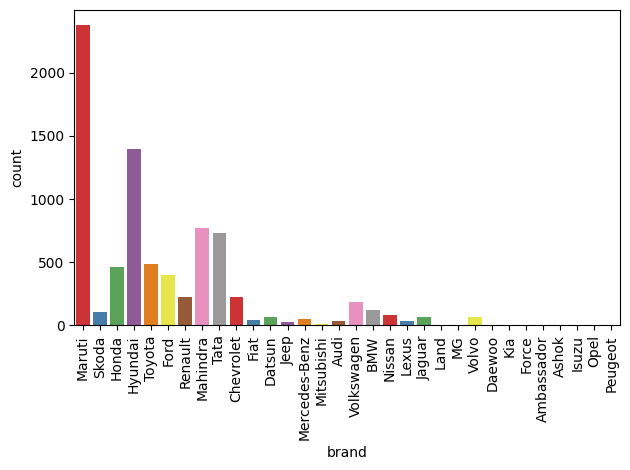

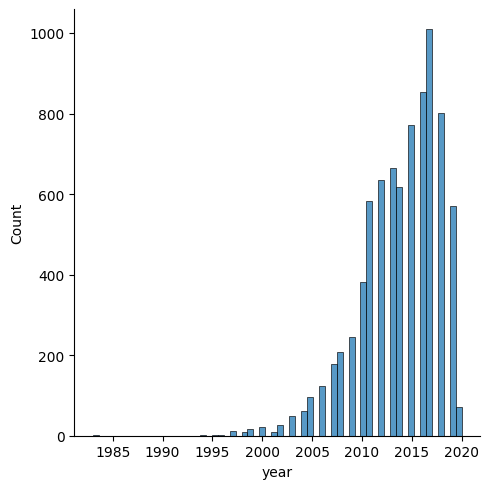

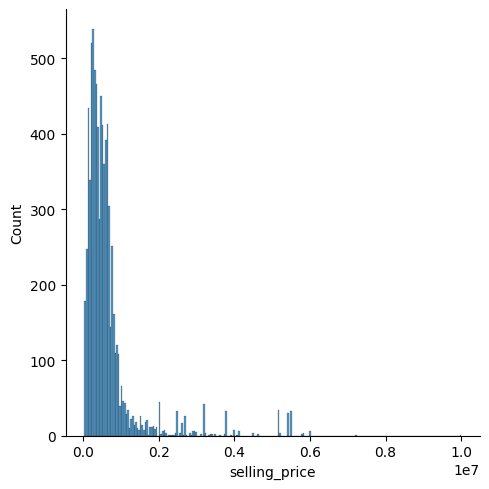

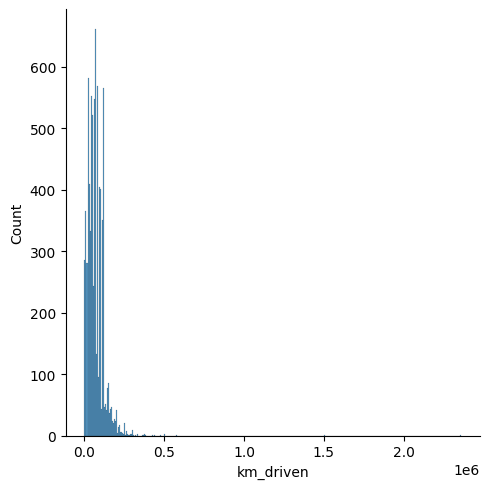

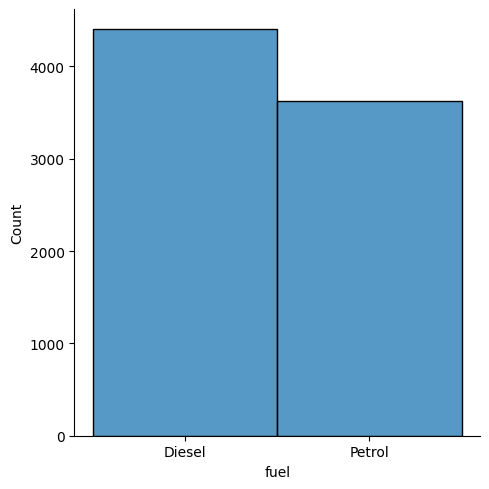

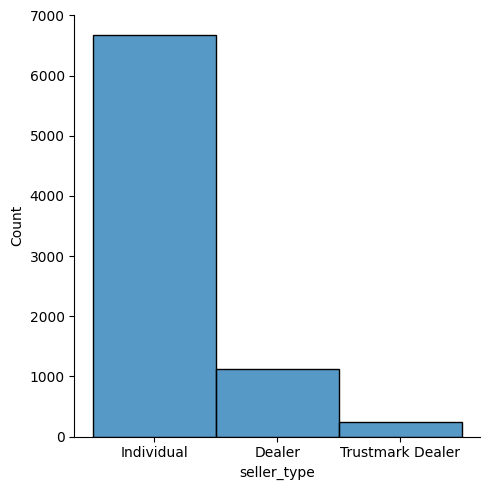

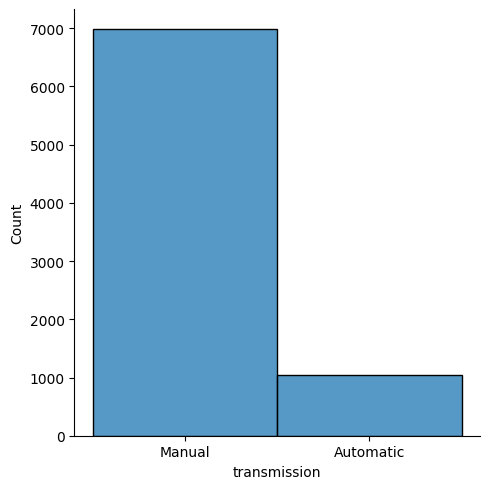

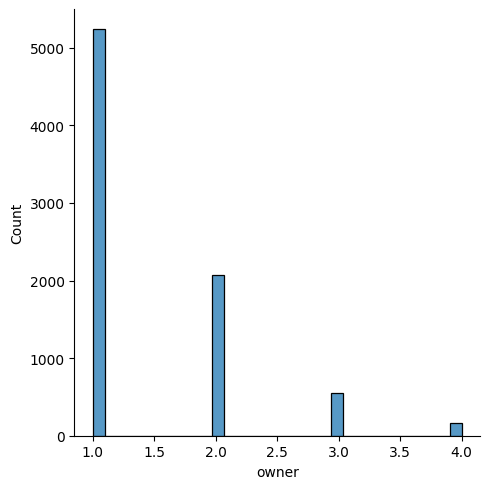

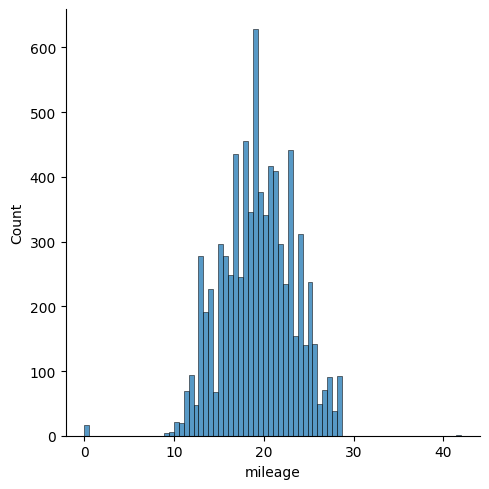

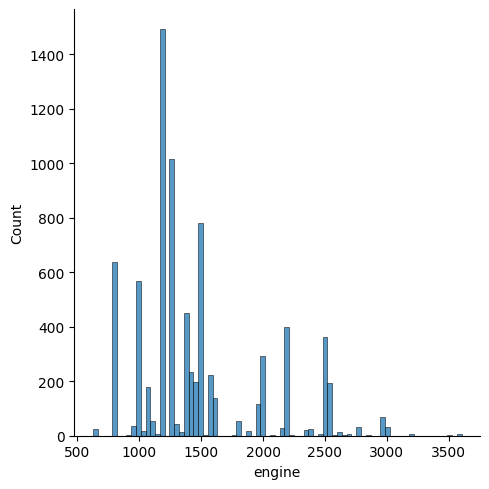

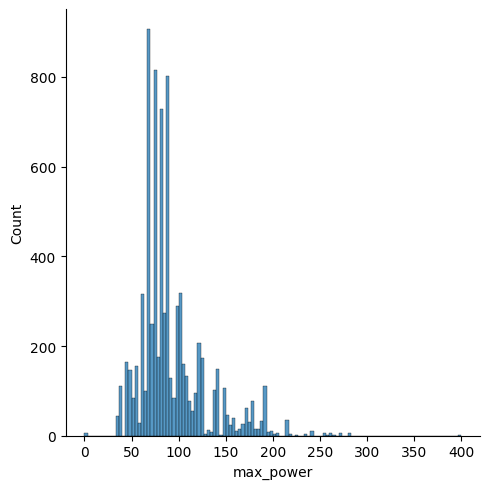

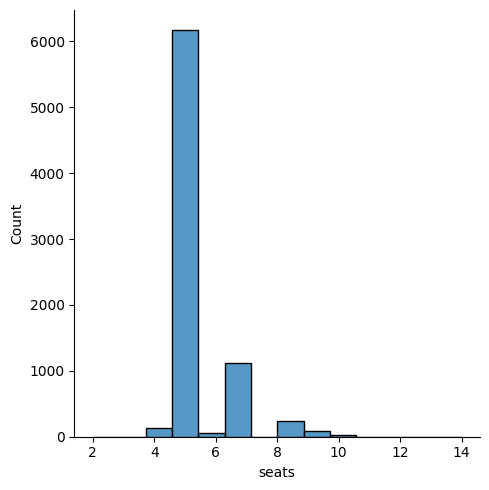

In [30]:
for j,i in enumerate(df.columns):
    if i == 'brand':
        ax = sns.countplot(data = df, x = i,palette= 'Set1')
        ax.set_xticklabels(df[i].unique(),rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        sns.displot(data=df,x=df[i])
        plt.show()
    

### 2.3 Multivariate analysis

Multiple variable exploratory data analysis

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting car price.  It's also for checking whether certain features are too correlated.

In [31]:
df_corr = df[[ 'year', 'selling_price', 'km_driven', 'owner', 'mileage', 'engine', 'max_power', 'seats']]


<Axes: >

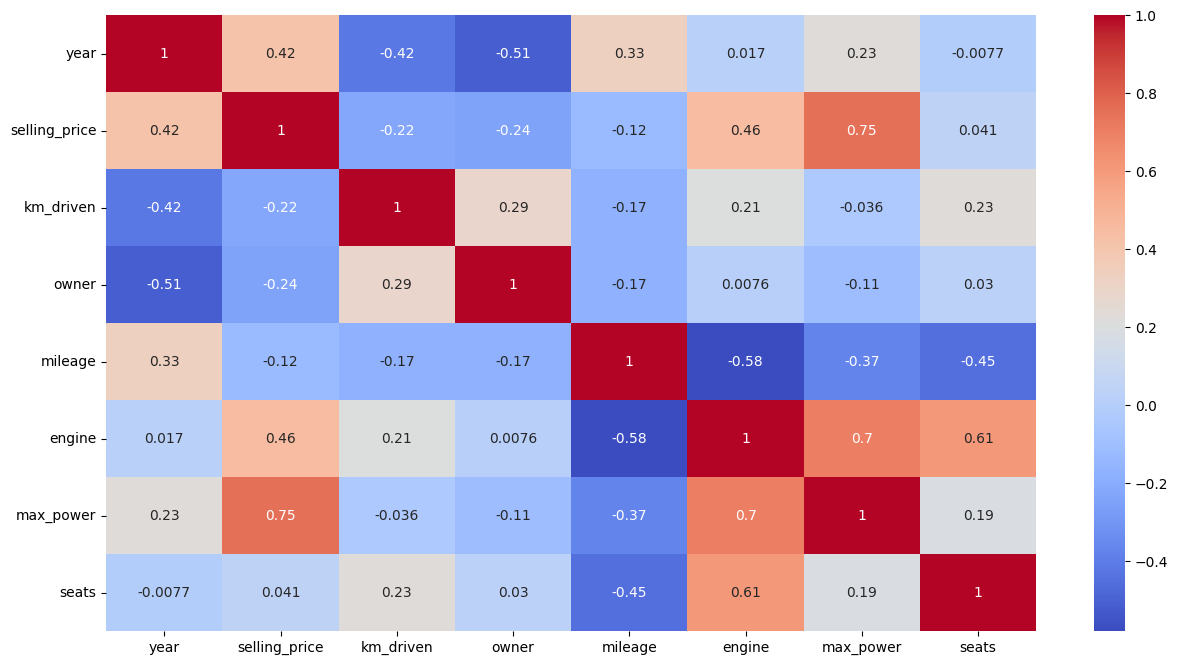

In [32]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df_corr.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Label encoding

Apply Label encoding to categorical features to see the correlations

In [33]:
# check unique values of four categorical features 

print(f"brand : {len(df['brand'].unique())}")
print(f"fuel : {len(df['fuel'].unique())}")
print(f"transmission : {len(df['transmission'].unique())}")
print(f"seller_type : {len(df['seller_type'].unique())}")

brand : 32
fuel : 2
transmission : 2
seller_type : 3


In [34]:
# apply label encoding to check corelation
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])
df["transmission"] = le.fit_transform(df["transmission"])
df["brand"] = le.fit_transform(df["brand"])
df["seller_type"] = le.fit_transform(df["seller_type"])

print(df["fuel"].unique(),df["transmission"].unique())
print(df["brand"].unique(),df["seller_type"].unique())

[0 1] [1 0]
[20 27 10 11 29  9 26 19 28  4  7  6 14 21 22  2 30  3 23 17 13 16 18 31
  5 15  8  0  1 12 24 25] [1 0 2]


<Axes: >

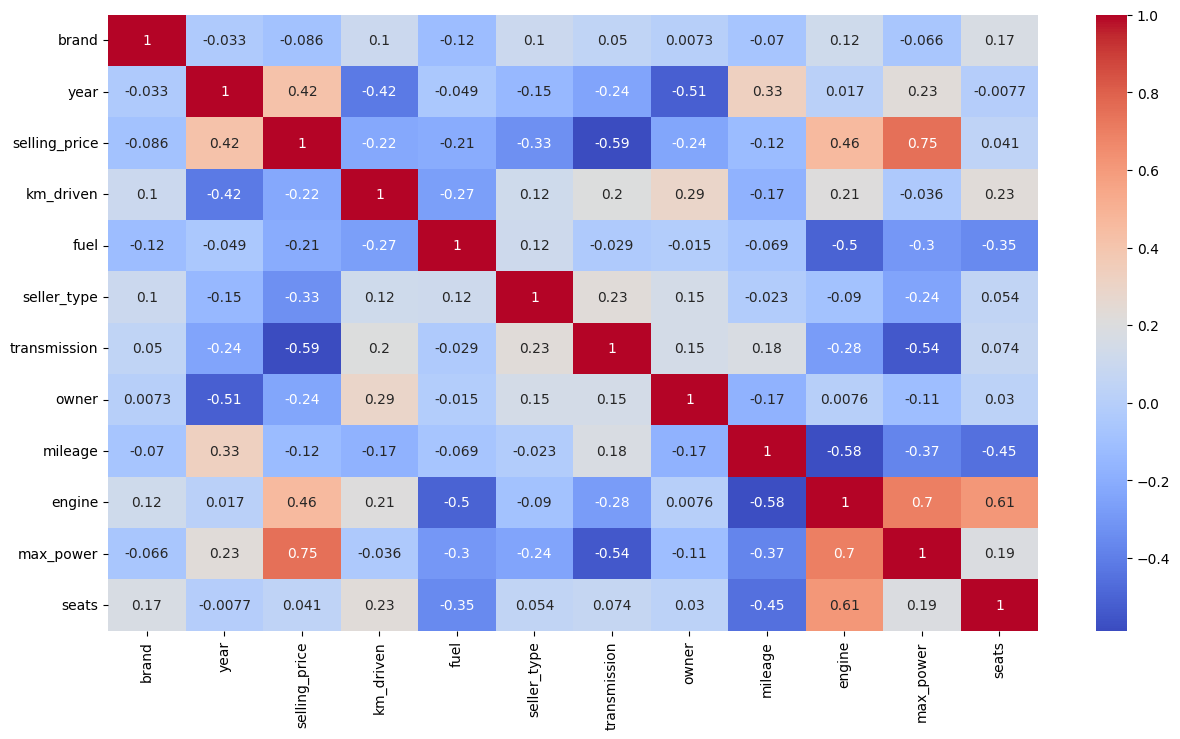

In [35]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Predictive Power Score

<Axes: xlabel='x', ylabel='y'>

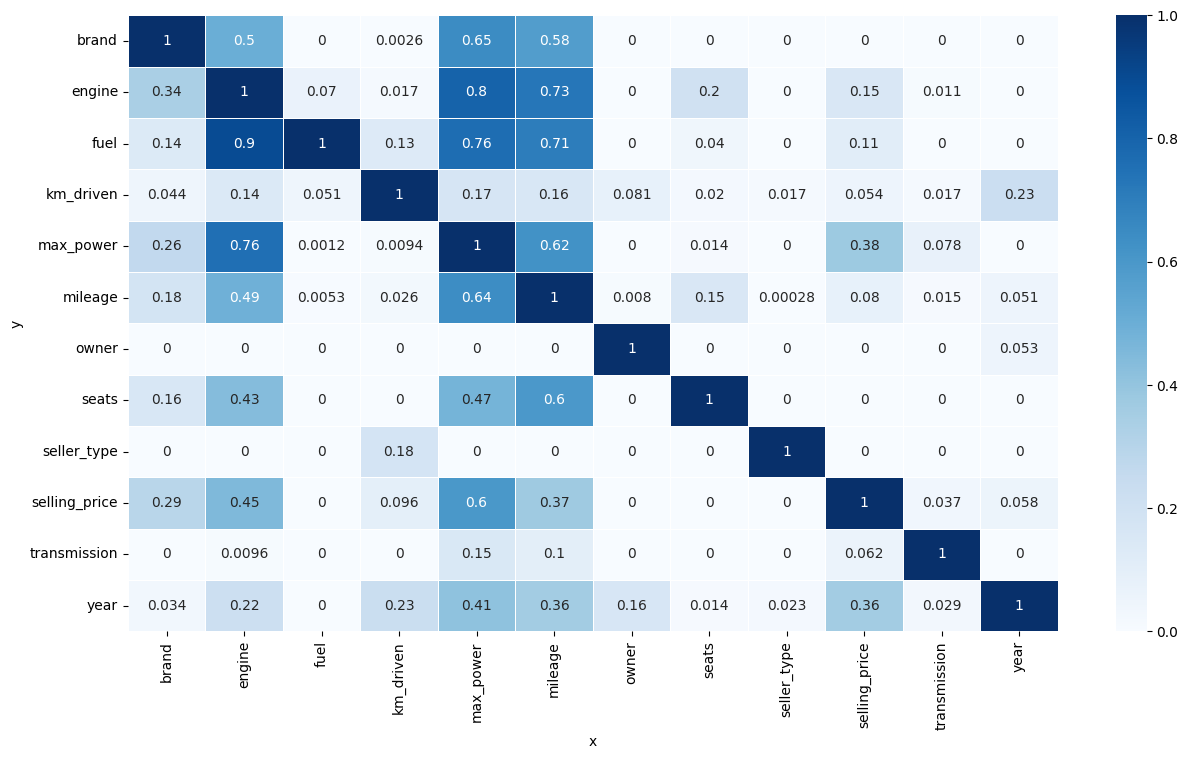

In [36]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
# dfcopy.drop(['country', 'year'], axis='columns', inplace=True)
# t = pps.matrix(dfcopy)[['x', 'y', 'ppscore']]
# t.pivot(index='x',columns='y',values='ppscore')
#this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

#plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

#### The brand feature will not be chosen to train model as it does not explain much to selling price. The seller_type has three unique categories. So, this feature will be one-hot encoded.

In [37]:
df['seller_type'] = le.inverse_transform(df['seller_type'] )

In [38]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,20,2014,450000,145500,0,Individual,1,1,23.40,1248.0,74.00,5.0
1,27,2014,370000,120000,0,Individual,1,2,21.14,1498.0,103.52,5.0
2,10,2006,158000,140000,1,Individual,1,3,17.70,1497.0,78.00,5.0
3,11,2010,225000,127000,0,Individual,1,1,23.00,1396.0,90.00,5.0
4,20,2007,130000,120000,1,Individual,1,1,16.10,1298.0,88.20,5.0


In [39]:
df = pd.get_dummies(data=df,columns=['seller_type'],drop_first=True,dtype=int)

In [40]:
df.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,20,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,27,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,10,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,11,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,20,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0


In [41]:
# normalizing the feature
df['year'] = df['year'].apply(lambda x : (x - 1886) / (2024-1886) )

In [42]:
# binning the target
df['selling_price'] = pd.cut(df['selling_price'],4,labels=False)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   brand                         8028 non-null   int64  
 1   year                          8028 non-null   float64
 2   selling_price                 8028 non-null   int64  
 3   km_driven                     8028 non-null   int64  
 4   fuel                          8028 non-null   int64  
 5   transmission                  8028 non-null   int64  
 6   owner                         8028 non-null   int64  
 7   mileage                       7814 non-null   float64
 8   engine                        7814 non-null   float64
 9   max_power                     7820 non-null   float64
 10  seats                         7814 non-null   float64
 11  seller_type_Individual        8028 non-null   int64  
 12  seller_type_Trustmark Dealer  8028 non-null   int64  
dtypes: float

In [44]:
df.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,20,0.927536,0,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,27,0.927536,0,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,10,0.869565,0,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,11,0.898551,0,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,20,0.876812,0,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0


## 3. Feature Engineering

We gonna skip Feature Engineering for now

## 4. Feature selection

According to the correlation matrix

- seats and brand have less than 0.2 of correlation scores with selling_price(target). So, these features will be removed.
- max_power and engine are highly correlated with 0.7. But, I will keep them both as high max_power with small engine might explain built quality of car (in terms of power losses due to friction)

According to the predictive power score

- transmission, owner, seller_type and km_driven has less than 0.1 score. 
- But, only km_driven will be removed as the others have fair correlation scores with selling_price and also with assumption of they are somewhat important and nuanced features.

In [45]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object')

In [46]:
#x is our strong features
X = df[['year', 'fuel', 'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission', 'owner', 'engine', 'max_power']]

#y is simply selling price
y = df["selling_price"]

In [47]:
# check if y has missing values to remove
df["selling_price"].isna().sum()

0

### Train test split

In [48]:
df.shape

(8028, 13)

In [49]:
# I assume only 10 percent of test data will be enough as it is around 800.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

## 5. Preprocessing

### Null values

In [50]:
#check for null values
X_train.isna().sum()

year                              0
fuel                              0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
transmission                      0
owner                             0
engine                          199
max_power                       193
dtype: int64

In [51]:
X_test.isna().sum()

year                             0
fuel                             0
seller_type_Individual           0
seller_type_Trustmark Dealer     0
transmission                     0
owner                            0
engine                          15
max_power                       15
dtype: int64

#### As the distributions of engine and max_power has right skewness, median values will be used to replace 

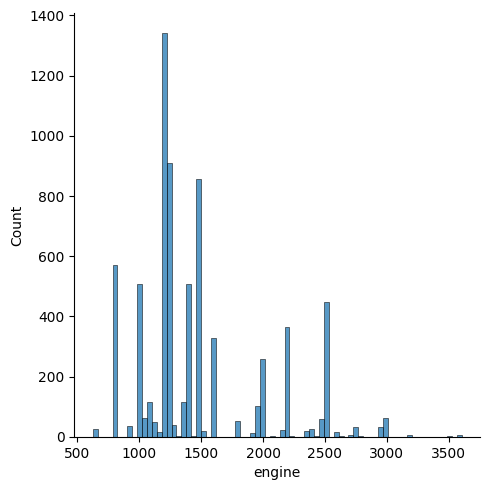

In [52]:
sns.displot(data=X_train, x='engine')

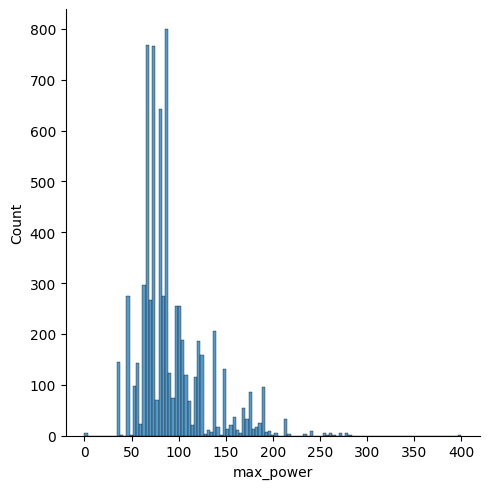

In [53]:
sns.displot(data=X_train, x='max_power')

In [54]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [55]:
#let's fill the testing set with the training distribution first!
# X_test['school'].fillna(X_train['school'].mean(), inplace=True)
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [56]:
#check again
X_train.isna().sum()

year                            0
fuel                            0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission                    0
owner                           0
engine                          0
max_power                       0
dtype: int64

In [57]:
X_test.isna().sum()

year                            0
fuel                            0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
transmission                    0
owner                           0
engine                          0
max_power                       0
dtype: int64

### Checking Outliers

#### For two numerical features of engine and max_power, outliers need to be checked for scaling

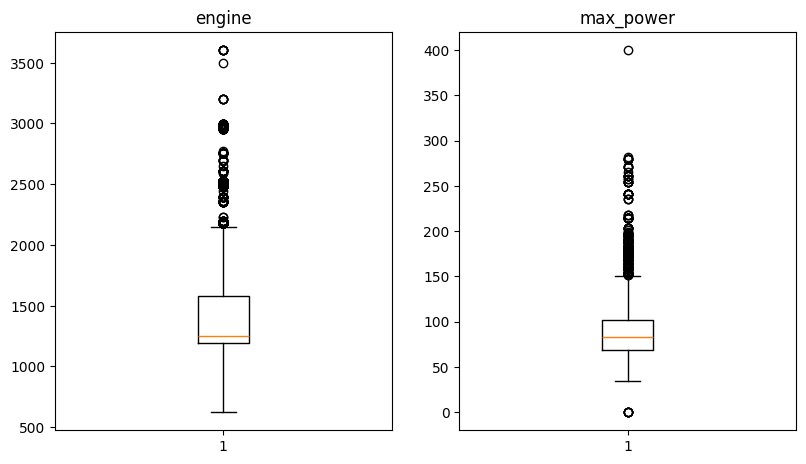

In [58]:
# Create a dictionary of columns.
col_dict = {'engine':1,'max_power':2}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [59]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [60]:
for col in ['engine','max_power']:
    outlier_count(col)


---------------engine---------------

Number of outliers: 1079
Percent of data that is outlier: 14.93%

---------------max_power---------------

Number of outliers: 519
Percent of data that is outlier: 7.18%


### Scaling

#### As the features of engine and max_power has a considerable amount of outliers and skewness and they are not in a bounded range, standardization can be used to scale.

In [61]:
from sklearn.preprocessing import StandardScaler

# feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X_train[['engine','max_power']] = scaler.fit_transform(X_train[['engine','max_power']])
X_test[['engine','max_power']]  = scaler.transform(X_test[['engine','max_power']])

#### For selling_price(y), np.log will be used to scale 

In [62]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse_output=False)
oh.fit(y_train.to_numpy().reshape(-1,1))
Y_train = oh.transform(y_train.to_numpy().reshape(-1,1))
Y_test = oh.transform(y_test.to_numpy().reshape(-1,1))

In [63]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", Y_train.shape)
print("Shape of y_test: ", Y_test.shape)

Shape of X_train:  (7225, 8)
Shape of X_test:  (803, 8)
Shape of y_train:  (7225, 4)
Shape of y_test:  (803, 4)


# 6. Modeling

Modifying the Multinomial Linear Regression class
- add accuracy score function
- add functions of precision, recall and f1-score for each class
- add functions macro precision, macro recall and macro f1
- add functions weighted precision, weighted recall	 and weighted f1
- add ridge L2 penalty
- compare the results of the implementation with scikit-learn classification report

In [180]:

from sklearn.model_selection import KFold
import time
# from mlflow.pyfunc import PythonModel

class MultinomialLogisticRegression(object):
    
    kfold = KFold(n_splits=5)
    
    def __init__(self, k, n, method,class_weights = None,penalty = 0,cv=kfold, alpha = 0.001, max_iter=5000):
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
        self.cv = cv
        self.penalty = penalty
        self.class_weights =class_weights

    def fit_CV(self,X,Y):
        self.cv_metric = {}
        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X)):
            X_cross_train = X[train_idx]
            Y_cross_train = Y[train_idx]
            X_cross_val   = X[val_idx]
            Y_cross_val   = np.argmax(Y[val_idx],axis=1)
            self.fit(X_cross_train,Y_cross_train)
            Y_hat = self.predict(X_cross_val)
            metric = {}
            metric['accuracy'] = self.accuracy(Y_cross_val,Y_hat)
            metric['precision'] = self.macro_metric("precision",Y_cross_val,Y_hat,self.class_weights)
            metric['recall'] = self.macro_metric("recall",Y_cross_val,Y_hat,self.class_weights)
            metric['f1_score'] = self.macro_metric("f1_score",Y_cross_val,Y_hat,self.class_weights)
            self.cv_metric[fold] = metric
        print(self.cv_metric)
        
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []
        # Y = np.asarray(Y).copy()
        # print(Y.shape)
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X[idx, :].reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
            print(f"time taken: {time.time() - start_time}")
            
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = (- np.sum(np.multiply(Y,np.log(h)) / m)) + (self.penalty * np.sum(np.square(self.W)))
        print(loss)
        # print(type(h),type(Y))
        error = h - Y
        grad = self.softmax_grad(X, error)
        return loss, grad

    def softmax(self, theta_t_x):
        # print( np.sum(theta_t_x, axis=1, keepdims=True))
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)

    def softmax_grad(self, X, error):
        return  (X.T @ error) + (2*self.penalty*self.W)

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()
        
    def accuracy(self,Y_true,Y_pred):
        Y_true = Y_true.reshape(1,-1)[0]
        Y_pred = Y_pred.reshape(1,-1)[0]
        return len(Y_pred[Y_true == Y_pred]) /  len(Y_pred)
    
    def _confusion_class(self,Y_true,Y_pred,c):
        Y_true = Y_true.reshape(1,-1)[0]
        Y_pred = Y_pred.reshape(1,-1)[0]
        class_filter = (Y_true == c) | (Y_pred == c)
        Y_true_class = Y_true[class_filter]
        Y_pred_class = Y_pred[class_filter]
        TP  = len(Y_true_class[Y_true_class == Y_pred_class])
        FP  = len(Y_true_class[(Y_true_class != Y_pred_class)  & (Y_pred_class == c)])
        FN  = len(Y_true_class[(Y_true_class != Y_pred_class)  & (Y_pred_class != c)])
        return (TP,FP,FN)
    
    def precision(self,Y_true,Y_pred,c):
        TP,FP,_ = self._confusion_class(Y_true,Y_pred,c)
        if  TP + FP == 0:
            p = 0
        else:
            p =  TP / (TP + FP)
        return p
    
    def recall(self,Y_true,Y_pred,c):
        TP,_,FN = self._confusion_class(Y_true,Y_pred,c)
        if  TP + FN == 0:
            r = 0
        else:
            r =  TP / (TP+FN)
        return r
    
    def f1_score(self,Y_true,Y_pred,c):
        p = self.precision(Y_true,Y_pred,c)
        r = self.recall(Y_true,Y_pred,c)
        if p + r == 0:
            f1 = 0
        else:
            f1 = 2 * p * r / (p + r)
        return f1
    
    def macro_metric(self,metric,Y_true,Y_pred,weighted=False):
        if metric == 'precision':
            macro_ = np.array([self.precision(Y_true,Y_pred,c) for c in np.unique(Y_true)])
        elif metric == 'recall':
            macro_ =  np.array([self.recall(Y_true,Y_pred,c) for c in np.unique(Y_true)])
        else:
            macro_  = np.array([self.f1_score(Y_true,Y_pred,c) for c in np.unique(Y_true)])
        if  weighted == True:
            weights =  np.array([len(Y_true[Y_true == c]) / len(Y_true) for c in np.unique(Y_true)])
            macro_m = np.sum(macro_ * weights)
        else:
            macro_m = np.mean(macro_)
        return macro_m
        

In [181]:
lg = MultinomialLogisticRegression(k=4,n=8,method='batch',penalty=0.9,max_iter=100)

In [182]:
lg.fit(X=X_train.to_numpy(),Y=Y_train)

8.87144212951591
Loss at iteration 0 8.87144212951591
155.87475443443776
149.81715214429624
146.1302361616937
144.10900011274924
142.68564385989583
141.5641057571601
140.531489355333
139.5279114312616
138.54563921816782
137.57848900183723
136.6255591809052
135.68534182268783
134.75751056890186
133.84147332146648
132.93697233213496
132.0436556259019
131.16127768673687
130.28956408678266
129.42827939231364
128.57718280315194
127.73605127406994
126.90466451243033
126.08281280874756
125.27029176631186
124.46690486723817
123.67246150115216
122.88677771296975
122.10967537443146
121.34098230832615
120.58053186754942
119.82816285235158
119.08371924267195
118.34705005377513
117.61800913264881
116.89645500215045
116.18225068928768
115.4752635743434
114.77536523862328
114.08243132311745
113.39634139019232
112.71697879220277
112.04423054409395
111.37798720105083
110.71814273999232
110.06459444505694
109.41724279650695
108.77599136294361
108.14074669651659
107.51141823098338
106.88791818242899
106.

In [183]:
y_hat = lg.predict(X_test=X_test.to_numpy())

In [184]:
lg.accuracy(Y_true=y_test.to_numpy(),Y_pred=y_hat)

0.9713574097135741

In [142]:
for i in range(lg.k):
    print (f" Metric for the class {i}")
    print("="*30)
    print(f"Precision  : {lg.precision(Y_true=y_test.to_numpy(),Y_pred=y_hat,c=i)}")
    print(f"Recall  : {lg.recall(Y_true=y_test.to_numpy(),Y_pred=y_hat,c=i)}")
    print(f"f1 score : {lg.f1_score(Y_true=y_test.to_numpy(),Y_pred=y_hat,c=i)} \n")


 Metric for the class 0
Precision  : 0.9960681520314548
Recall  : 0.9921671018276762
f1 score : 0.9941137998691956 

 Metric for the class 1
Precision  : 0.5142857142857142
Recall  : 0.782608695652174
f1 score : 0.6206896551724138 

 Metric for the class 2
Precision  : 0.4
Recall  : 0.14285714285714285
f1 score : 0.21052631578947364 

 Metric for the class 3
Precision  : 0
Recall  : 0
f1 score : 0 



In [143]:
print (f" Macro Metric")
print("="*30)
# print(lg.macro_metric(metric="precision",Y_true=y_test.to_numpy(),Y_pred=y_hat))
p =  lg.macro_metric(metric="precision",Y_true=y_test.to_numpy(),Y_pred=y_hat)
r =   lg.macro_metric(metric="recall",Y_true=y_test.to_numpy(),Y_pred=y_hat)
f1  =  lg.macro_metric(metric="f1",Y_true=y_test.to_numpy(),Y_pred=y_hat)
print(f"Precision : {p}" )
print(f"Recall : {r}")
print(f"F1_score : {f1}")

 Macro Metric
Precision : 0.636784622105723
Recall : 0.639210980112331
F1_score : 0.6084432569436944


In [144]:
print (f" Macro Metric with class weights")
print("="*30)
# print(lg.macro_metric(metric="precision",Y_true=y_test.to_numpy(),Y_pred=y_hat))
p =  lg.macro_metric(metric="precision",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)
r =   lg.macro_metric(metric="recall",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)
f1  =  lg.macro_metric(metric="f1",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)
print(f"Precision : {p}" )
print(f"Recall : {r}")
print(f"F1_score : {f1}")

 Macro Metric with class weights
Precision : 0.9718764332312152
Recall : 0.9713574097135741
F1_score : 0.9697564149312852


In [145]:
from sklearn.metrics import classification_report
print(classification_report(y_true=y_test,y_pred=y_hat))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       766
           1       0.51      0.78      0.62        23
           2       0.40      0.14      0.21        14

    accuracy                           0.97       803
   macro avg       0.64      0.64      0.61       803
weighted avg       0.97      0.97      0.97       803



The resluts of the implementations are almost the same with scikit-learn classification report, Here, support in  the classification report is the number of samples that are used the calculating the metrics.

In [198]:
# Creating experiment in MLflow 
import mlflow
import os
mlflow.set_tracking_uri("http://mlflow.ml.brain.cs.ait.ac.th/")
os.environ['MLFLOW_TRACKING_USERNAME'] = 'admin'
os.environ['MLFLOW_TRACKING_PASSWORD'] = 'password'
os.environ['LOGNAME'] = 'st125066'
mlflow.set_experiment(experiment_name="st125066-a3")

<Experiment: artifact_location='mlflow-artifacts:/881703814181867940', creation_time=1728266589594, experiment_id='881703814181867940', last_update_time=1728266589594, lifecycle_stage='active', name='st125066-a3', tags={}>

In [185]:
lg_cv = MultinomialLogisticRegression(k=4,n=8,method='batch',penalty=0.9,max_iter=100)

In [186]:
lg_cv.fit_CV(X=X_train.to_numpy(),Y=Y_train)

8.338207698921847
Loss at iteration 0 8.338207698921847
42.234760894393595
40.482614711123084
39.92354706282143
39.65463773733321
39.43841178788658
39.23088181611018
39.03307208154957
38.84207333011642
38.658160842817765
38.48064672057007
38.30930698715787
38.14376782032171
37.98374762447671
37.82895432109455
37.679126048986696
37.53401235497755
37.39338050908552
37.25701130540758
37.12469943991267
36.99625203097063
36.87148803219444
36.750237349469195
36.63234016867562
36.5176462687246
36.40601441165748
36.29731176422165
36.19141336540753
36.08820162868749
35.987565879322055
35.88940192243722
35.793611639991916
35.700102614061564
35.60878777449563
35.51958506903189
35.43241715420981
35.34721110555462
35.26389814566305
35.18241338894374
35.1026956018816
35.02468697779489
34.94833292514277
34.87358186851962
34.80038506154202
34.7286964108961
34.65847231086796
34.589671487729106
34.52225485339311
34.456185367799186
34.391427909514576
34.327949154080244
34.26571745965417
34.20470275953398

### 6.1 Experiment

Since the performance on the test runs in model selection is good enough, I will experiment only gradient method and learning rate.

In [166]:
# generating all possible experiments
import itertools
method = ['batch','minibatch','sto']
lr = [0.01,0.001,0.0001]
experiments = pd.DataFrame(list(itertools.product(method,lr)),
                           columns=['GD_methods','Learning_Rates'])
experiments

,GD_methods,Learning_Rates
0,batch,0.0100
1,batch,0.0010
2,batch,0.0001
3,minibatch,0.0100
4,minibatch,0.0010
5,minibatch,0.0001
6,sto,0.0100
7,sto,0.0010
8,sto,0.0001


In [205]:
# running the experiments
model = MultinomialLogisticRegression(k=4,n=8,method='batch',penalty=0.9,max_iter=100)
for i,(method,lr) in experiments.iterrows():
    model.method = method
    model.alpha = lr
    # print("Logistic Regression with L2 regularizqtion")
    exp_name = f"method-{method}-lr-{lr}"
    print(exp_name)
    mlflow.start_run(run_name=exp_name, nested=True)
    model.fit_CV(X_train.to_numpy(), Y_train)
    
    params = {"method": method, "lr": lr}
    mlflow.log_params(params=params)
    
    y_hat = model.predict(X_test.to_numpy())
    
    accuracy = model.accuracy(Y_true=y_test.to_numpy(),Y_pred=y_hat)
    p =  model.macro_metric(metric="precision",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)
    r =   model.macro_metric(metric="recall",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)
    f2  =  model.macro_metric(metric="f1",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)
    
    mlflow.log_metric(key="accuracy", value=accuracy, step=i)
    mlflow.log_metric(key="weighted_precision", value=p, step=i)
    mlflow.log_metric(key="weighted_recall", value=r, step=i)
    mlflow.log_metric(key="weighted_f1_score", value=f2, step=i)
    
    signature = mlflow.models.infer_signature(X_train.to_numpy(), model.predict(X_train.to_numpy()))
    mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)
    
    mlflow.end_run()

method-batch-lr-0.01
10.107689350717147
Loss at iteration 0 10.107689350717147
13527.557807277653
12615.538320014006
11892.367675046635
11309.219686279655
10770.675248204214
10280.409573548966
9836.388955345254
9433.113809712937
9058.479053939735
8701.192779643698
8356.838863985507
8026.5748618695925
7709.22726854489
7405.075383231195
7112.522721760343
6833.511838522128
6568.549154830945
6325.679307745537
6080.62202302363
5853.041978581116
5626.885201390507
5416.4664683194915
5207.957844946908
5012.891546853536
4820.652287023875
4640.129352656445
4462.8046669100595
4295.515066837718
4132.0523891486055
3977.1002532378843
3826.3460275544644
3682.5824418908724
3543.7558222800003
3410.452088762822
3282.561102279912
3158.6871113931784
3041.1901677390947
2926.1253263394988
2818.0727390853635
2710.89340782634
2612.0039234447668
2512.1600623784393
2421.4336890408126
2328.2009899505088
2245.5775366780276
2158.4034503003786
2082.763830678931
2001.1874527550117
1932.678834516721
1856.097164235162

2024/10/07 15:24:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-lr-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/d8fb9c661adb487b8e20dd80ed0300ac.
2024/10/07 15:24:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-batch-lr-0.001
10.623075076701932
Loss at iteration 0 10.623075076701932
132.70367041849815
128.37834762567883
125.58584017065255
124.01441310655117
122.99957352504536
122.10024859445515
121.24460881750134
120.41456670208728
119.6025199423912
118.80482404503566
118.01948188324633
117.2453207584766
116.4816012910819
115.72782529257569
114.98363233206375
114.24874253922853
113.5229239301521
112.80597352182974
112.09770631108631
111.39794882525702
110.70653534528276
110.02330569904302
109.348103978212
108.68077779832366
108.02117787771819
107.36915780296691
106.7245739025608
106.08728518264022
105.45715329743523
104.83404253825081
104.21781983143693
103.60835473970204
103.00551946346162
102.40918884031132
101.81924034155873
101.2355540652646
100.65801272556325
100.086501638232
99.5209087026062
98.96112438001717
98.407041668978
97.85855607737453
97.3155655919313
96.77797064522957
96.24567408055226
95.7185811148232
95.19659929989889
94.67963848245687
94.16761076271072
93.660430452166

2024/10/07 15:24:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-lr-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/6e3e36411641450cb1549a3331525cad.
2024/10/07 15:24:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-batch-lr-0.0001
14.767776180762816
Loss at iteration 0 14.767776180762816
13.89598602372362
14.239522237064907
14.496930731442239
14.70656703944576
14.886821370618742
15.047637431744793
15.194889786806174
15.332244758646468
15.46206992096139
15.585926811538366
15.704859090967739
15.819571152644166
15.93054373813533
16.038110974510726
16.142512413409797
16.243928125498652
16.342501995245716
16.438356744844715
16.5316032265267
16.622345841217097
16.710685430821233
16.7967205969826
16.880548097828406
16.962262751049572
17.041957112538103
17.11972109071905
17.195641584835546
17.26980219000918
17.342282984508355
17.41316039913288
17.482507160618425
17.55039229753758
17.616881196400048
17.68203569631248
17.745914211899663
17.808571875772472
17.870060693408103
17.930429704758158
17.989725148166354
18.047990623245546
18.105267250243312
18.16159382413471
18.21700696224332
18.271541244631454
18.325229346837947
18.378102164797653
18.430188931966114
18.481517328810146
18.532113584921646
18.

2024/10/07 15:24:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-batch-lr-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/7e7d49a17332451babe0d8ac0fffcde5.
2024/10/07 15:24:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-minibatch-lr-0.01
7.62521199863307
Loss at iteration 0 7.62521199863307
1050.3386772246029
999.539858840701
939.9487410972669
894.4817790351482
859.1592120130367
824.8320398008385
792.9860598695358
760.3058826762355
732.1203430901793
702.8291890265314
675.6416873356136
649.6187501938443
624.3826245670374
598.7493434245403
575.9433556948413
552.8911303635401
531.326917056322
509.68772788099324
490.31054855701285
472.12285407857416
453.30421141807574
435.16447337927065
418.89878732860114
402.0045024898747
387.0653326013766
372.8065567052962
357.8752409145698
343.5436834018218
330.6410784871775
317.87199239957926
305.8284641997177
294.13765655627884
283.77563702722324
273.6206555904218
263.01306134310016
252.9501232472239
243.75359295659516
233.96673290129843
225.37310678819824
216.87631727883183
208.72448340418134
200.50970945354396
192.55170507415497
185.69769039205926
178.86820337623752
171.93400696527743
165.55817098811772
159.8925200050509
154.53130834688295
147.7968425642123


2024/10/07 15:25:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-lr-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/5ea8707fd5834b62affa925e76f58526.
2024/10/07 15:25:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-minibatch-lr-0.001
11.769958940082654
Loss at iteration 0 11.769958940082654
19.808030589525046
19.425117610678434
19.252746834117776
19.020145509300683
18.92014900406945
18.881746124261266
18.859808807746173
18.863289690477835
18.874262244659185
18.898607250850823
18.926946694131587
18.86999994566204
18.909546935333886
18.956518331774884
18.98285123472208
19.020422036921644
19.027294271148666
19.050726504889123
19.07269045318127
19.311215490489023
19.025913070584803
18.996225538265133
19.016370836259167
19.05478986536983
19.082441871615323
19.120058914766798
19.149623296250383
19.168712080089804
19.19354297012385
19.20925062478386
19.23995563401931
19.260540001728792
19.271642795513976
19.28534593197048
19.31017049221978
19.334130498624674
19.350648423326827
19.393577207010313
19.42013653956333
19.432316666784054
19.43754872298666
19.47822895375767
19.473641647395578
19.472827788194447
19.48567302862158
19.46406324063101
19.466156433270005
19.49444593885405
19.496887511285586
1

2024/10/07 15:25:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-lr-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/598e9e8e80004aff828a6f043dfbcda5.
2024/10/07 15:25:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-minibatch-lr-0.0001
11.548862060204614
Loss at iteration 0 11.548862060204614
10.563820522152474
10.072408309355684
9.927000667008944
9.942923887195622
10.001047681442486
10.080882736926442
10.172455917356059
10.232877315829635
10.342928795997315
10.464946441886
10.414846398882336
10.517378403378466
10.603595122331232
10.653460552670376
10.723608997964298
10.783212408108168
10.853247482634709
10.925129425167581
10.991057083557568
11.056246761057421
11.111587016921131
11.143050092743836
11.197854025197596
11.25876351611662
11.316534794694078
11.510939390837882
11.359198144973371
11.393359205221333
11.460246917869203
11.499455219484462
11.553101517971186
11.578342048215085
11.586201631818728
11.614404201805925
11.660694086345053
11.70902415088022
11.736640080815297
11.775573901601119
11.826576610898154
11.85543439157847
11.898684198533351
11.931107428488623
11.951770407303368
12.001029634255199
12.255566748701305
12.033687616792724
12.045343738237523
12.088297513547213
12.12405992

2024/10/07 15:25:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-minibatch-lr-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/523edec44f6c447198f9679d272a6f36.
2024/10/07 15:25:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-sto-lr-0.01
11.643409406239329
Loss at iteration 0 11.643409406239329
11.493693729798483
10.836698157379436
10.585663094454874
10.381967877047137
9.565709851503373
9.562777128300056
8.866636751926578
8.804883052808115
8.62964517342996
8.19166984341966
8.193317200369535
7.646895959354306
7.55716027340608
7.459249746580833
7.023988949614566
6.885199244037991
6.387790154992853
6.394035322867251
6.294800145964139
6.010281061964591
5.691730080466902
5.418733616135212
5.473440989432836
6.404877302477929
5.041627947405956
5.684492558485715
4.685710177498185
4.722589007488969
4.519365245779757
4.402490816734364
4.001865930436825
4.101105741355345
4.11142891710422
3.914542979384683
3.7697731776451118
3.522445428320482
3.3469449386149908
3.6344044938147406
3.420425920316111
3.2737989607433584
2.8395934132701597
2.998089704851785
2.9386674002545017
2.79125522378074
3.119213393603551
2.922732320159204
2.5895682372051616
2.6907485934430295
2.5914171935160155
2.569333906656805
2.2651924541677

2024/10/07 15:25:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-lr-0.01 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/91719d5924ea4bbb9763d4050f693811.
2024/10/07 15:25:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-sto-lr-0.001
10.511857155191246
Loss at iteration 0 10.511857155191246
11.956700093862388
11.284710912994896
11.022220766813973
11.535163294809276
11.318242412782254
11.230619647280607
11.506188615333148
10.986678431720177
11.250191347644947
11.571359462443725
11.093817697494158
11.298009425447402
10.647151991326222
10.811298550868008
10.8110419338926
10.266833264491053
10.981262029945622
11.234163783799373
11.203653839613175
10.44483857333852
10.996904687629703
10.99843608129826
10.37856660516917
10.537226717631382
10.013667305733009
10.934290560093615
10.712632670129604
10.663295690745024
9.617305149277751
10.78313470335415
10.043909238998758
9.915398345097314
10.02385332660926
9.580984524750718
10.755076143686328
10.146480703896055
10.35484274878562
10.293033874009653
9.84952386770964
9.679941729566105
10.092733064591254
10.166723279301838
10.12468253277363
9.790999680081194
9.744812084199525
10.168299914344441
9.155732622395515
11.302420201667374
9.529140593251702
10.4002487

2024/10/07 15:25:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-lr-0.001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/f48c3d6e8ad34f778fa1b198175c38bb.
2024/10/07 15:25:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


method-sto-lr-0.0001
8.166291277962422
Loss at iteration 0 8.166291277962422
8.562146107401855
8.19109995059271
8.266610874869738
8.160001436115943
8.395265616432745
8.158813660149871
8.379434110216904
8.696575091289688
8.397857265508783
7.3994563310680785
8.179616687365892
8.435547752942949
8.392279281992437
8.124019852304771
8.202649885764764
8.165440185382401
8.3814853720077
8.098436524342953
8.15640177232739
8.426805603370362
8.348880372047702
8.35722441269138
8.61472330264854
8.360668346838654
7.824234457122237
8.681769627130771
8.143883853364912
7.9315995723971575
8.248700185596501
8.157876274731265
8.25137394311077
8.146836891455402
8.140605795564902
8.236118122689327
8.84377856339526
8.263571826324771
8.316824509722744
8.29480398522289
8.696569798041692
8.691356625219576
8.061324842296715
8.394553050257143
8.304800237588195
8.146654641504835
8.299768915837259
7.923579395092095
8.359483857401012
8.0452838218287
8.276288426368746
8.281163241331841
8.290802041030584
8.354542505561

2024/10/07 15:25:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run method-sto-lr-0.0001 at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940/runs/5d092d7cc1684607a2f02fb12e95c571.
2024/10/07 15:25:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://mlflow.ml.brain.cs.ait.ac.th/#/experiments/881703814181867940.


According the experiment results, the mini-batch gradient method with learning rate 0.001 is the best model.

# 7. Testing

Now, the best model will be searched and loaded to test on test set

In [206]:
model_uri = f"models:/st125066-a3-model@dsai-ait"
model = mlflow.sklearn.load_model(model_uri)

In [210]:
# do inference on the test set
yhat = model.predict(X_test.to_numpy())

In [1004]:
# accuracy of the test set
model.accuracy(Y_true=y_test.to_numpy(),Y_pred=y_hat)


np.float64(1.5635440164345504)

In [1005]:
# weighted precision of the test set
model.macro_metric(metric="precision",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)

np.float64(0.551287877583187)

In [ ]:
# weighted
model.macro_metric(metric="recall",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)

In [ ]:
# weighted f1 score
model.macro_metric(metric="f1",Y_true=y_test.to_numpy(),Y_pred=y_hat,weighted=True)

# 8. Inference

In [219]:
# predicted value
model.predict([X_test.iloc[0]])

array([0])

In [215]:
# true value
y_test.iloc[0]

0